## Time Series Forecasting

### Time Series Patterns

#### Difference Between Trend, Seasonality and cyclic behaviour
**Trend**: If event(Sales, cost) increase consistently every year, then we will see a positive trend in the data. Conversely, if event consistently decline, the trend will be negative.

**Seasonality**: Events may experience an increase in the summer, when the calendar time is better for it. Therefore, we will look at the seasonal component in the event data.

**Cyclic**: If there is an economic recession, event (Sales) may decline because people are more reluctant to spend money. Economic cycles like these can cause cyclical fluctuations in event (Sales) data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

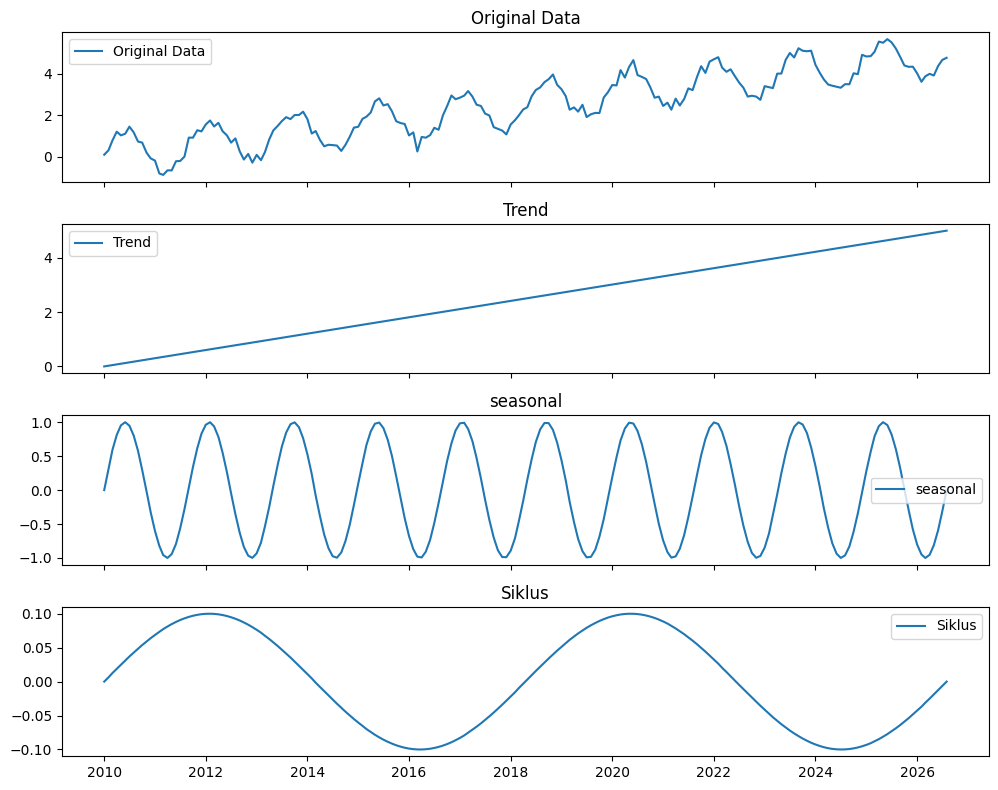

In [2]:
#make data sintetis
np.random.seed(42)
n = 200
t = np.linspace(0,10,n)
trend = 0.5 * t
seasonal = np.sin(2 * np.pi * t)
cyclical = 0.1 * np.sin (2 * np.pi * t / 5)
noise=0.2*np.random.normal(size=n)
data=trend+seasonal+cyclical+noise


#make dataFrame
df = pd.DataFrame(data, columns=['Sales'])
df.index = pd.date_range(start='2010-01-01', periods=n, freq='MS')

#describes the components of a time series

fig, ax=plt.subplots(4,1, figsize=(10,8),sharex=True)

ax[0].plot(df, label='Original Data')
ax[0].set_title('Original Data')
ax[0].legend()

ax[1].plot(df.index, trend,  label='Trend')
ax[1].set_title('Trend')
ax[1].legend()

ax[2].plot(df.index, seasonal,  label='seasonal')
ax[2].set_title('seasonal')
ax[2].legend()

ax[3].plot(df.index, cyclical,  label='Siklus')
ax[3].set_title('Siklus')
ax[3].legend()

plt.tight_layout()

#### Seasonal Plots

In [3]:
import pandas as pd
import io, requests
import plotly.express as px

# use requests so that there are no issues with utf-8 encoding
df = pd.read_csv(
    io.StringIO(
        requests.get(
            "https://raw.githubusercontent.com/joaolcorreia/RFM-analysis/master/sample-orders.csv"
        ).text
    )
)
df["order_date"] = pd.to_datetime(df["order_date"])

px.line(
    df.assign(

        year=df["order_date"].dt.year,
        month=df["order_date"].dt.month,
        month_name=df["order_date"].dt.strftime("%b"),
    )
    .groupby(["year", "month", "month_name"], as_index=False)
    .agg(value=("grand_total", "sum")),
    x="month_name",
    y="value",
    color="year",
)


/var/folders/t8/kwl37c951n7b2z9qz3hgb0n80000gn/T/ipykernel_56816/1776039693.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["order_date"])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'year=2011<br>month_name=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2011',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '2011',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                          'Nov', 'Dec'], dtype=object),
              'xaxis': 'x',
              'y': array([13949,  4810, 55695, 28298, 23647, 34593, 33945, 27910, 81784, 31449,
                          78633, 69547]),
              'yaxis': 'y'},
             {'hovertemplate': 'year=2012<br>month_name=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2012',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '2012',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                          'Nov', 'Dec'], dtype=object),
              'xaxis': 'x',
              'y': array([18174, 12211, 38469, 34196, 30137, 24800, 28767, 36898, 64595, 31406,
                          75968, 74918]),
              'yaxis': 'y'},
             {'hovertemplate': 'year=2013<br>month_name=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2013',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '2013',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                          'Nov', 'Dec'], dtype=object),
              'xaxis': 'x',
              'y': array([18543, 22867, 51185, 39251, 56693, 39431, 38440, 33261, 72909, 56463,
                          82190, 97244]),
              'yaxis': 'y'},
             {'hovertemplate': 'year=2014<br>month_name=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2014',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '2014',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                          'Nov', 'Dec'], dtype=object),
              'xaxis': 'x',
              'y': array([ 44708,  20287,  53917,  40110,  45655,  48256,  48429,  61517,  90495,
                           77802, 112329,  90480]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'year'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'month_name'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})